# PHYS 139 Final Project

In [1]:
from collections import defaultdict
import random as random

from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

%matplotlib inline

In [2]:
# Plot formatting
font = dict(family='Times New Roman',
            weight='normal',
            size=20)
rc('font', **font)
rcParams['figure.figsize'] = 9, 6
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.size'] = 14
rcParams['font.weight'] = 'normal'
rcParams['axes.linewidth'] = 0.3
rcParams['axes.labelsize'] = 16
rcParams['lines.linewidth'] = 1

## Part A

We have no guess as to where our changepoint is, therefore we will assign it a uniform prior,

$$P(n_0)= \frac{1}{N}.$$

We will assume that the number of mine accidents each year, $x_n$ are modeled by the Poisson distribution,

$$P(x|\lambda) = \frac{\left(\lambda\tau\right)^x}{x!}\exp{\left(-\lambda\tau\right)}.$$

or, for $\tau=1,$

$$P(x|\lambda) = \frac{\lambda^x}{x!}\exp{-\lambda}.$$


We assume that the observations have been genrated by two different Poisson distributions; $P\left(x|\lambda_1\right)$ before the change point, and $P\left(x|\lambda_2\right)$ after. The only information we have on $\lambda_1$ and $\lambda_2$ is that they are distribted according to a prior gamma distribution,

$$P\left(\lambda\right) = Gamma\left(\lambda|a,b\right) = \frac{1}{\Gamma\left(a\right)}b^a\lambda^{a-1}\exp\left(-b\lambda\right).$$

The join gamma distribution is,

$$P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right) = \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2).$$

Bayes tells us,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right)P(\lambda_1)P(\lambda_2)P(n_0)$$

or,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2)P(\lambda_1)P(\lambda_2)P(n_0).$$

Pluggin in each distribution we get,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \prod_{n=1}^{n_0}\frac{\lambda_1^{x_n}}{x_n!}\exp(-\lambda_1)\prod_{n=n_0+1}^N\frac{\lambda_2^{x_n}}{x_n!}\exp(-\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n}\exp(-n_0\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n}\exp(-(N-n_0)\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)\frac{1}{\Gamma(a)}b^a\frac{1}{\Gamma(a)}b^a\frac{1}{N}$$

$$=\frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

$$=C\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

where $C = \frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)$ is just a normalizatin constant.

Thus,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2).$$

We define the following quantities,

$$a_1 = a + \sum_{n=1}^{n_0}x_n$$
$$b_1 = b+n_0$$
$$a_2 = a + \sum_{n=n_0+1}^{N}x_n$$
$$b_2 = b + N-n_0.$$

We can rewrite the joint probability as,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2).$$

From this result we can see that $P(\lambda_1|n_0,\lambda_2,x_{1:N}) = Gamma(\lambda_1| a_1, b_1)$ and $P(\lambda_2|n_0,\lambda_1,x_{1:N}) = Gamma(\lambda_2| a_1, b_1)$

Furthermore,

$$P(n_0| \lambda_1,\lambda_2, x_{1:N}) \propto P(n_0, \lambda_1,\lambda_2|x_{1:N})$$

$$\log{\left(P(n_0|\lambda_1,\lambda_2,x_{1:N}))\right)} \propto\log{(\lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2))}$$

$$= \log{(\lambda_1^{a_1-1})}+\log{(\exp(-b_1\lambda_1)}+\log{(\lambda_2^{a_2-1})}+\log{(\exp(-b_2\lambda_2))}$$

Thus,

$$\log{\left(P(n_0|\lambda_1,\lambda_2, x_{1:N})\right)} \propto(a_1-1)\lambda_1-b_1\lambda_1+(a_2-1)\lambda_2-b_2\lambda_2$$

## Mine Accident Data

In [3]:
data = pd.read_csv('mine_data.csv')

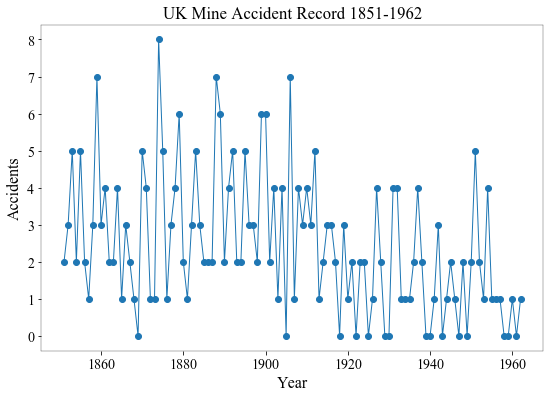

In [4]:
plt.plot('year', 'accidents', '-o', data=data)
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('UK Mine Accident Record 1851-1962')
#plt.savefig('uk_mine_accident_record', dpi=300)
plt.show()

In [5]:
def gibbs(steps, data):
    # Constants and Initial Positions
    a1 = a2 = b1 = b2 = 3
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_year = []
    
    years = data.year.values
    accidents = data.accidents.values

    # Initial lambda_2 value
    lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
    
    for step in range(steps):
        # Before Change at n_0
        lambda_1 = np.random.gamma(a1 + np.sum(accidents[:n_0]), 1./(n_0 + b1))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]
        
        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]
        
        # After Change at n_0
        lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]
        
        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]

        # Add values to our trackers
        track_lambda_1.append(lambda_1)
        track_lambda_2.append(lambda_2)
        track_year.append(years[n_0])
        
    return track_lambda_1, track_lambda_2, track_year

In [111]:
steps = int(2e5+200)
l1, l2, change_year = gibbs(steps, data)

l1 = l1[200:]
l2 = l2[200:]
change_year = change_year[200:]

## Part C

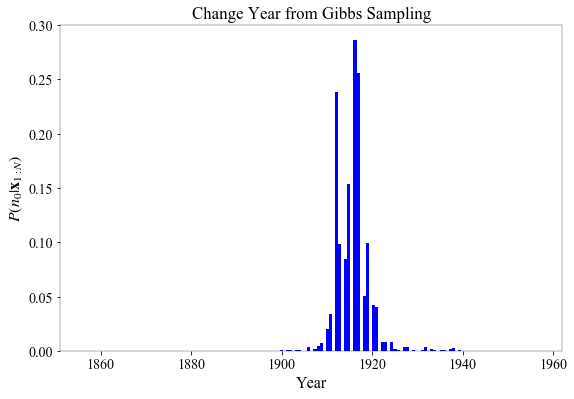

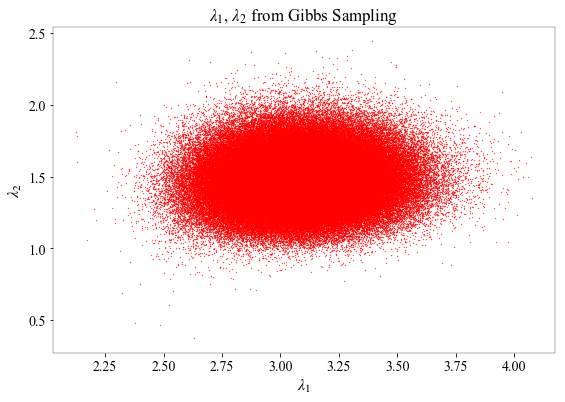

In [112]:
plt.hist(change_year, 100, color='b', label='$n_0$', density=True)
plt.xlim(1851, 1962)
plt.xlabel('Year')
plt.ylabel('$P(n_0|\mathbf{x}_{1:N})$')
plt.title('Change Year from Gibbs Sampling')
#plt.savefig('gibbs_hist', dpi=300)
plt.show()

plt.scatter(l1, l2, color='r', s=0.1)
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.title('$\lambda_1$, $\lambda_2$ from Gibbs Sampling')
#plt.savefig('gibbs_scatter', dpi=300)
plt.show()

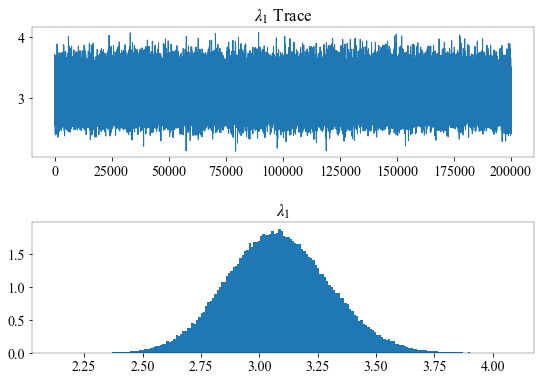

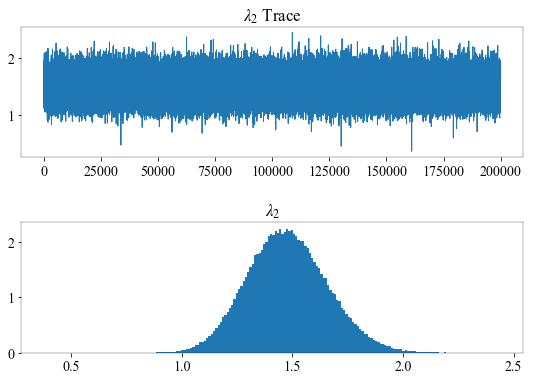

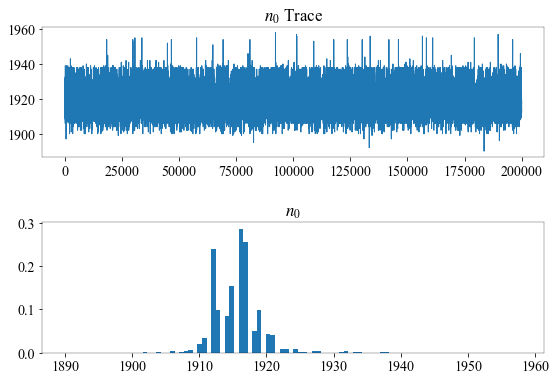

In [113]:
fig1 = plt.figure()
fig1.subplots_adjust(hspace=.5)
plt.subplot(2, 1, 1)
plt.plot(l1, label='$\lambda_1$ trace')
plt.title('$\lambda_1$ Trace')
plt.subplot(2, 1, 2)
plt.hist(l1, 200, density=True)
plt.title('$\lambda_1$')
plt.show()


fig2 = plt.figure()
fig2.subplots_adjust(hspace=.5)
plt.subplot(2, 1, 1)
plt.plot(l2, label='$\lambda_2$ trace')
plt.title('$\lambda_2$ Trace')
plt.subplot(2, 1, 2)
plt.hist(l2, 200, density=True)
plt.title('$\lambda_2$')
plt.show()

fig3 = plt.figure()
fig3.subplots_adjust(hspace=.5)
plt.subplot(2, 1, 1)
plt.plot(change_year, label='$n_0$ trace')
plt.title('$n_0$ Trace')
plt.subplot(2, 1, 2)
plt.hist(change_year, 100, density=True)
plt.title('$n_0$')
plt.show()

## Part D

In [114]:
print('mean(change_year) = ', np.mean(change_year))
print('mean(lambda_1) =    ', np.mean(l1))
print('mean(lambda_2) =    ', np.mean(l2))

mean(change_year) =  1915.6736
mean(lambda_1) =     3.081619135745637
mean(lambda_2) =     1.478000688033861


## Part E

In [115]:
def get_error(data):
    return data[::100], np.std(data[::100])

In [116]:
l1_sub, l1_err = get_error(np.array(l1))
l2_sub, l2_err = get_error(np.array(l2))
n0_sub, n0_err = get_error(np.array(change_year))

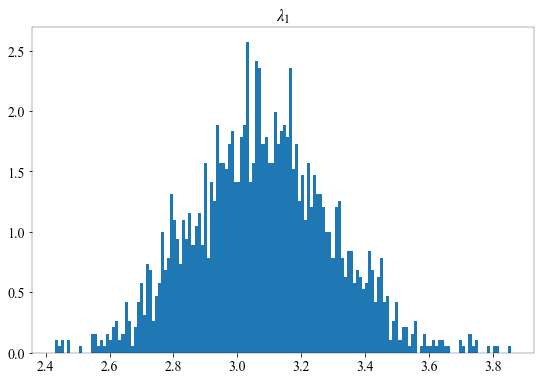

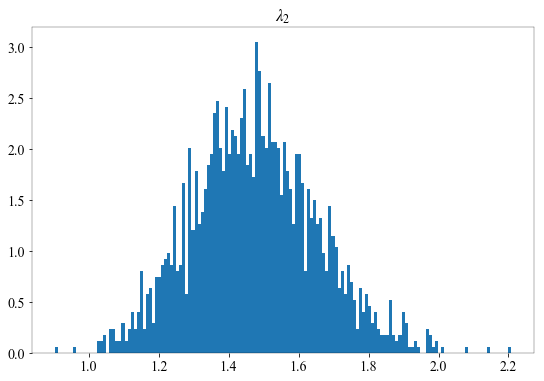

In [117]:
plt.hist(l1_sub, 150, density=True)
plt.title('$\lambda_1$')
plt.show()

plt.hist(l2_sub, 150, density=True)
plt.title('$\lambda_2$')
plt.show()

In [118]:
print('lambda_1 error = ', l1_err)
print('lambda_2 error = ', l2_err)
print('n_0 error =      ', n0_err)

lambda_1 error =  0.21746361105759168
lambda_2 error =  0.17814932367387987
n_0 error =       3.421489989755925


### Results

$$\lambda_1 = 3.08 \pm 0.22$$
$$\lambda_2 = 1.48 \pm 0.18$$
$$n_0 = 1915.7 \pm 3.4$$

## Part F

In [14]:
def metropolis(steps, data):
    # Constants and Initial Positions
    a1 = a2 = b1 = b2 = 3
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_year = []
    
    years = data.year.values
    accidents = data.accidents.values
    
    lambda_1 = lambda_2 = 2

    while len(track_lambda_1) < steps:
        # Before Change at n_0
        prop_lambda_1 = np.random.normal(lambda_1, 0.5)
        prop_lambda_2 = np.random.normal(lambda_2, 0.5)
        
        p_of_n_0 = [np.exp(np.log(prop_lambda_1) * np.sum(accidents[:y]) - prop_lambda_1 * y 
                   + np.log(prop_lambda_2) * np.sum(accidents[y:]) - prop_lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]

        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        prop_n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]
        
        # Metropolis accept/reject algorithm
        if probs[prop_n_0] > probs[n_0]:
            # Add values to our trackers
            n_0 = prop_n_0
            lambda_1 = prop_lambda_1
            lambda_2 = prop_lambda_2
            track_lambda_1.append(lambda_1)
            track_lambda_2.append(lambda_2)
            track_year.append(years[n_0])
        elif random.random() < probs[prop_n_0]/probs[n_0]:
            n_0 = prop_n_0
            lambda_1 = prop_lambda_1
            lambda_2 = prop_lambda_2
            track_lambda_1.append(lambda_1)
            track_lambda_2.append(lambda_2)
            track_year.append(years[n_0])
    
    return track_lambda_1, track_lambda_2, track_year

In [15]:
metro_l1_full, metro_l2_full, metro_change_year_full = metropolis(steps, data)

C:\Users\sabre\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
C:\Users\sabre\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [22]:
# Eliminate burn in data
burnin=200
metro_l1 = metro_l1_full[burnin:]
metro_l2 = metro_l2_full[burnin:]
metro_change_year = metro_change_year_full[burnin:]

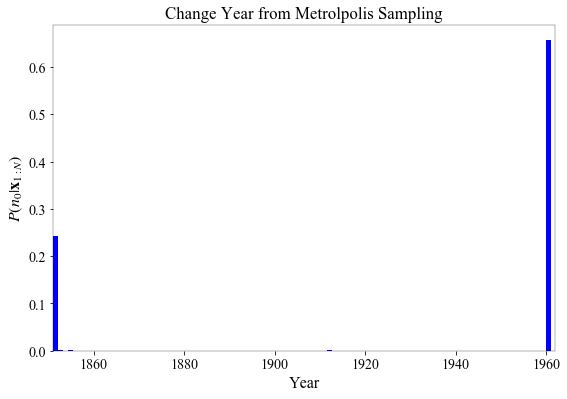

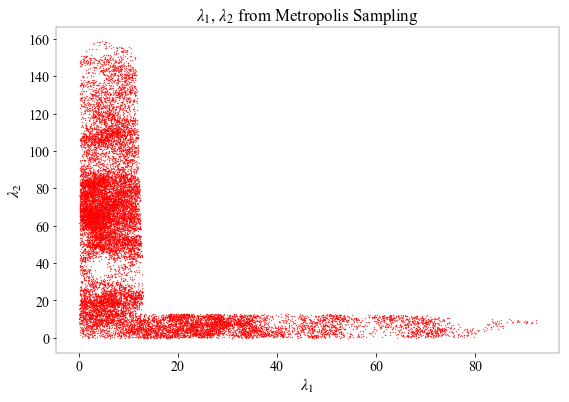

In [23]:
plt.hist(metro_change_year, 100, color='b', label='$n_0$', density=True)
plt.xlim(1851, 1962)
plt.xlabel('Year')
plt.ylabel('$P(n_0|\mathbf{x}_{1:N})$')
plt.title('Change Year from Metrolpolis Sampling')
#plt.savefig('metro_hist', dpi=300)
plt.show()

plt.scatter(metro_l1, metro_l2, color='r', s=0.1)
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.title('$\lambda_1$, $\lambda_2$ from Metropolis Sampling')
#plt.savefig('metro_scatter', dpi=300)
plt.show()

In [24]:
print('mean(change_year) = ', np.mean(metro_change_year))
print('mean(lambda_1) =    ', np.mean(metro_l1))
print('mean(lambda_2) =    ', np.mean(metro_l2))

mean(change_year) =  1930.86905
mean(lambda_1) =     13.241928754541231
mean(lambda_2) =     51.71012036795533


In [19]:
metro_l1_means, metro_l1_errs = get_means(np.array(metro_l1))
metro_l2_means, metro_l2_errs = get_means(np.array(metro_l2))
metro_change_year_means, metro_change_year_errors = get_means(np.array(metro_change_year))

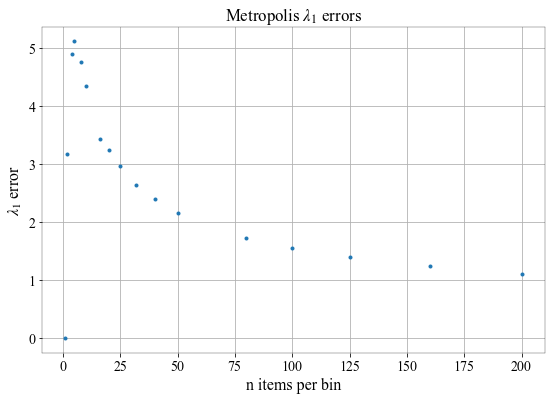

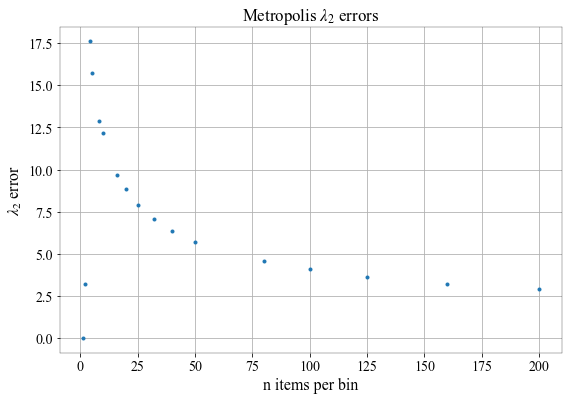

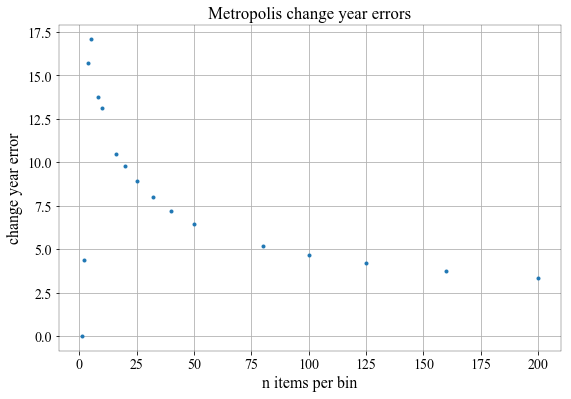

In [20]:
n = -int(0.45*len(metro_l1_errs))

rcParams['axes.grid']=True
plt.plot(list(metro_l1_errs)[:n], list(metro_l1_errs.values())[:n], '.')
plt.title('Metropolis $\lambda_1$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_1$ error')
#plt.savefig('metro_l1_error', dpi=300)
plt.show()

plt.plot(list(metro_l2_errs)[:n], list(metro_l2_errs.values())[:n], '.')
plt.title('Metropolis $\lambda_2$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_2$ error')
#plt.savefig('metro_l2_error', dpi=300)
plt.show()

plt.plot(list(metro_change_year_errors)[:n], list(metro_change_year_errors.values())[:n], '.')
plt.title('Metropolis change year errors')
plt.xlabel('n items per bin')
plt.ylabel('change year error')
#plt.savefig('metro_change_year_error', dpi=300)
plt.show()
rcParams['axes.grid']=False

In [21]:
print('N of items per bin: ', list(metro_l1_errs)[n-1])
print('lambda_1 error:     ', list(metro_l1_errs.values())[n-1])
print('lambda_2 error:     ', list(metro_l2_errs.values())[n-1])
print('change year error:  ', list(metro_change_year_errors.values())[n-1])

N of items per bin:  200
lambda_1 error:      1.107300214382698
lambda_2 error:      2.8893740703282504
change year error:   3.3477712642872572


We can see that the gibbs and metropolis algorithims agree and have similar errors!